## GraphFrame

This is just to verify that everything works ok with `graphframes`

### Procedure for local execution:

1. Download at:
http://spark-packages.org/package/graphframes/graphframes
Put in the same folder where your spark job will run

2. Run in the terminal
pyspark --py-files graphframes-0.8.0-spark3.0-s_2.12.jar --jars graphframes-0.8.0-spark3.0-s_2.12.jar

3. Put in the notebook:
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages graphframes:graphframes:0.8.0-spark3.0-s_2.12 pyspark-shell'


In [1]:
#!pyspark --py-files graphframes-0.8.0-spark3.0-s_2.12.jar --jars graphframes-0.8.0-spark3.0-s_2.12.jar

In [2]:
import os
#os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages graphframes:graphframes:0.6.0-spark2.3-s_2.11 pyspark-shell'
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages graphframes:graphframes:0.7.0-spark2.3-s_2.11 pyspark-shell'
#os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages graphframes:graphframes:0.8.0-spark3.0-s_2.12 pyspark-shell'

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import udf

In [3]:
sc = pyspark.SparkContext("local[*]")
spark = SparkSession.builder.appName('notebook').getOrCreate()

In [4]:
from graphframes import *
import hashlib

In [5]:
# Create a Vertex DataFrame with unique ID column "id"
v = spark.createDataFrame([
  ("a", "Alice", 34),
  ("b", "Bob", 36),
  ("c", "Charlie", 30),
], ["id", "name", "age"])

# Create an Edge DataFrame with "src" and "dst" columns
e = spark.createDataFrame([
  ("a", "b", "friend"),
  ("b", "c", "follow"),
  ("c", "b", "follow"),
], ["src", "dst", "relationship"])

# Create a GraphFrame
from graphframes import *
g = GraphFrame(v, e)

# Query: Get in-degree of each vertex.
g.inDegrees.show()

# Query: Count the number of "follow" connections in the graph.
g.edges.filter("relationship = 'follow'").count()

# Run PageRank algorithm, and show results.
results = g.pageRank(resetProbability=0.01, maxIter=5)
results.vertices.select("id", "pagerank").show()

+---+--------+
| id|inDegree|
+---+--------+
|  c|       1|
|  b|       2|
+---+--------+

+---+------------+
| id|    pagerank|
+---+------------+
|  b|1.9705930399|
|  a|        0.01|
|  c|1.0194069601|
+---+------------+



In [6]:
def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'],row['dst'])

    plt.subplot(121)
    nx.draw(Gplot, with_labels=True, font_weight='bold')

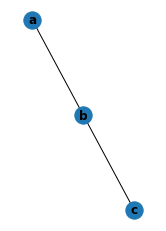

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
PlotGraph(g.edges)